In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [31]:
df=pd.read_csv('Admission_Predict.csv')

In [32]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [35]:
x=df.drop(df.columns[[0,8]],axis=1)

In [38]:
y=df[df.columns[[8]]]

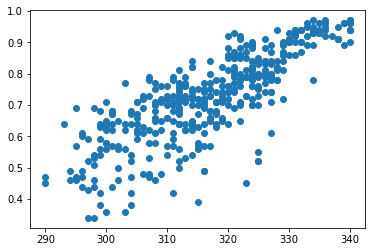

In [40]:
plt.scatter(df['GRE Score'],y)

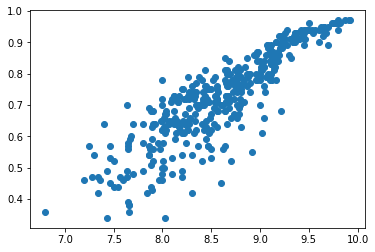

In [41]:
plt.scatter(df['CGPA'],y)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

In [56]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [45]:
reg=linear_model.LinearRegression()

In [46]:
reg.fit(train_x,train_y)

LinearRegression()

In [47]:
from sklearn.metrics import r2_score

In [55]:
score=r2_score(reg.predict(test_x),test_y)
score

0.7727846883591627

In [50]:
filename='finalized_model.pickle'

In [51]:
pickle.dump(reg,open(filename,'wb'))

In [54]:
loaded_model=pickle.load(open(filename,'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

[0.99741192]
